In [ ]:
#@title Preparing our environment


# Imports the required libraries
import cv2
import dlib
import math
import gdown
import unittest
import numpy as np
import urllib.request

from scipy.spatial import distance
from matplotlib import pyplot as plt

###Getting the Dlib Shape predictor!

dlibshape_url = 'https://drive.google.com/uc?id=17D3D89Gke6i5nKOvmsbPslrGg5rVgOwg'
dlibshape_path ='./shape_predictor_68_face_landmarks.dat'
gdown.download(dlibshape_url, dlibshape_path, True)

print ("Done")

Done


# Emotion Detection

Have you ever been in a situation where you signed up for this online course. However, after attending couple of sessions, you dropped out of the course.
According to facts, more than 70 % people enrolled in online courses tend to dropout. Why is it so? Well, there could be multiple reasons to this such as the unadaptable teaching style, quality and the difficulty of the teaching content etc.

However, if feedback system based on emotions which could predict the behavior of the student as to if they were delighted, frustrated or confused was incorporated wouldn't it make learning better?

Well ofcourse it would!!! Imagine a scenario were confusion was seen as prominent emotion within the class. What it could possibly imply is either they didn't understand the content or they couldnt adhere to tutor's teaching style. This kind of feedback can be taken into account so that the upcoming sessions could be suited better to the needs of the students.

Emotion Detection also has a wide variety of applications. Smart cars with facial emotion detection technology can help understand if the driver is feeling drowsy and send driver personalized alerts to stop for coffee break or change the music etc.

Companies are also using emotion detection during the Video Game Testing phase. It helps them understand which emotions are experienced at what points in the game.Taking written feedback from the user who has experienced the game can be inefficient. This is because it can often be difficult to put an experience into words. 

Facial Emotion detection is a practical means of going beyond the spoken or written feedback and appreciating what the user is experiencing. Such kind of feedback is more reliable than other forms of feedback.


![Demo](https://drive.google.com/uc?export=view&id=1Fad8inQU07xPMcAkeGSY7N1CmEMoWivE)

I'm building an AI tool that can help predict the emotions based on the Facial Expressions. 

You will classify the facial expressions into one of the following core emotions: **Anger, Happy, Sad, Surprise, Fear**





#Milestone 1: Understanding Face Detection

**What is Face Detection?**

Face detection is a computer vision technology that helps to locate human faces in images. This technique is a specific use case of object detection technology that deals with detecting instances of semantic objects of a certain class (such as humans, buildings or cars) in images and videos

 

![](https://cdn.xl.thumbs.canstockphoto.com/happy-woman-with-umbrella-walking-in-autumn-park-season-weather-and-people-concept-beautiful-stock-photo_csp40883320.jpg)

##Face Detection Demonstration



Face Detection is an important step in the emotion classification pipeline. It helps us eliminate parts of the image which have no relevance in detecting the emotion

Face detection algorithms are used to predict the bounding box co-ordinates of the face

![](https://drive.google.com/uc?export=view&id=1ZE-3eN2sarQ0h9kusTO5hosWLi2S4mlw)

Dlib is a popular Python library complied in C++. For this project we will use
Dlib's pre-trained Face detection model to extract the bounding box co-ordinates of the face


###Load Pretrained Dlib model

In [ ]:
# Load's dlib's pretrained face detector model
frontalface_detector = dlib.get_frontal_face_detector()

In [ ]:
#@title Defining a helper Function for Face Detection

'''
  Converts dlib rectangular object to bounding box co-ordinates
'''
def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    return (x, y, w, h)


In [ ]:
#@title Defining a helper Function for Face Detection with a given image

"""
Detects the face in the given image
"""
def detect_face(image_url):
  """
  :type image_url: str
  :rtype: None
  
  """
  try:
    
    #Decodes image address to cv2 object
    url_response = urllib.request.urlopen(image_url)
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    image = cv2.imdecode(img_array, -1)
    
  except Exception as e:
    return "Please check the URL and try again!"
    
  #Detect faces using dlib model
  rects = frontalface_detector(image, 1)
  
  if len(rects) < 1:
    return "No Face Detected"
  
  # Loop over the face detections
  for (i, rect) in enumerate(rects):
    # Converts dlib rectangular object to bounding box co-ordinates
    (x, y, w, h) = rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

  plt.imshow(image, interpolation='nearest')
  plt.axis('off')
  plt.show()
  

### Face Detection

###Try it Out!!!

Enter the URL of the image:  https://i.pinimg.com/236x/27/28/0e/27280ee28567c1e20c119f74981ee5c4--black-freckles-freckles-makeup.jpg


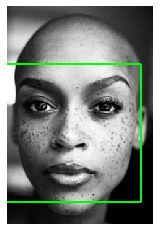

In [ ]:
# https://www.clickinmoms.com/blog/wp-content/uploads/2014/10/black-and-white-portrait-of-man-with-his-eyes-closed-by-Brian-Powers.jpg
# https://i.pinimg.com/736x/a8/59/05/a85905aad4b379aafd63bbbd3144025d--freya-mavor-beautiful-people.jpg
# https://i.pinimg.com/236x/27/28/0e/27280ee28567c1e20c119f74981ee5c4--black-freckles-freckles-makeup.jpg

# Give the path of the image for face detection
detect_face(input('Enter the URL of the image: '));

#Milestone 2: Understanding Facial Landmarks

**What are Facial Landmarks?**


Facial landmarks are a set of key points on human face images/Facial Landmarks represent the points of interest within the face. The points are defined by their (x,y) coordinates on the image. These points are used to locate and represent salient regions of the face, such as eyes, eyebrows, nose, mouth and jawline.

##Facial Landmark Demonstration

Facial Landmark estimation is an important feature extraction steps in solving variety of applications such as face recognition, facial expression recognition, face swapping, face filters and much more. 

The number of Facial key points on the face can be variable depending on the pre-trained facial landmark model being used.



![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ3TMlMcOORwi88JUPO3xvHbjl8yBGDZnMMNhfpY5pS4Mvq_n7w)

For this project, we will be using Dlib's pretrained Facial Landmark Detection Model which help us detect 68 2-Dimensional points on the human face



## Facial Landmark Estimation using DLib

In this section, we are going to look at the code to extract and plot the 68 Facial Landmarks for the given image.



###Load Pre-trained DLib models

In [ ]:
# Load's dlib's pretrained face detector model
frontalface_detector = dlib.get_frontal_face_detector()
#Load the 68 face Landmark file
landmark_predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')

### Extracting Facial Landmarks

In [ ]:
#@title Defining a helper function for Face Detection from a url


"""
Returns facial landmarks for the given input image path
"""
def get_landmarks(image_url):
  """
  :type image_url : str
  :rtype image : cv2 object
  :rtype landmarks : list of tuples where each tuple represents 
                     the x and y co-ordinates of facial keypoints
  """
  
  try:
    
    #Decodes image address to cv2 object
    url_response = urllib.request.urlopen(image_url)
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    image = cv2.imdecode(img_array, -1)
    
  except Exception as e:
    print ("Please check the URL and try again!")
    return None,None
  
  #Detect the Faces within the image
  faces = frontalface_detector(image, 1)
  if len(faces):
    landmarks = [(p.x, p.y) for p in landmark_predictor(image, faces[0]).parts()]
  else:
    return None,None
  
  return image,landmarks

###Visualizing Facial Landmarks

In [ ]:
#@title Defined a helper function to visualize landmarks

"""
Display image with its Facial Landmarks
"""
def image_landmarks(image,face_landmarks):
  """
  :type image_path : str
  :type face_landmarks : list of tuples where each tuple represents 
                     the x and y co-ordinates of facial keypoints
  :rtype : None
  """
  radius = -1
  circle_thickness = 5
  image_copy = image.copy()
  for (x, y) in face_landmarks:
    cv2.circle(image_copy, (x, y), circle_thickness, (255,0,0), radius)
    
  plt.imshow(image_copy, interpolation='nearest')
  plt.axis('off')
  plt.show()
  

###Testing it Out!!!!

In [ ]:
#Extract the Facial Landmark co-ordinates
image,landmarks= get_landmarks(input("Enter the URL of the image: ")) #url

#Plot the Facial Landmarks on the face
if landmarks:
  image_landmarks(image,landmarks)
else:
  print ("No Landmarks Detected")

In [ ]:
#@title Visualizing the features we've extracted

def show_indices(landmarks, i_index): 
  
  plt.scatter(x=[landmarks[i][0] for i in range(len(landmarks)//2, len(landmarks))], 
              y=[-landmarks[i][1] for i in range(len(landmarks)//2, len(landmarks))], s=50, alpha=.5, color='blue', label='second half of indices') 

  plt.scatter(x=[landmarks[i][0] for i in range(len(landmarks)//2)], 
              y=[-landmarks[i][1] for i in range(len(landmarks)//2)], color='red', alpha=.5, label='first half of indices')

  # what should X and Y be to visualize the feature at i_index? 
  #plt.scatter(x=X, y=-Y, 
  #            color='purple', s=100, marker='x', label='feature at index %d'%i_index)

  plt.axis('off');
  plt.legend(bbox_to_anchor=[1,1]);
  plt.title('Visualizing the features we\'ve extracted from this image',y =1.2); 

In [ ]:
show_index = 30
show_indices(landmarks, show_index)

In [ ]:
#@title Which Facial Landmark points correspond to which part of the face? { display-mode: "form" }
LeftEye= "17-26" #@param["0-16", "17-26", "27-35","36-41","42-47","48-67","Fill Me In"] 
RightEye = "27-35"#@param["0-16", "17-26", "27-35","36-41","42-47","48-67","Fill Me In"]  
Eyebrows = "42-47"#@param["0-16", "17-26", "27-35","36-41","42-47","48-67","Fill Me In"] 
Nose = "17-26"#@param["0-16", "17-26", "27-35","36-41","42-47","48-67","Fill Me In"] 
Mouth = "27-35"#@param["0-16", "17-26", "27-35","36-41","42-47","48-67","Fill Me In"] 
Jawline = "36-41"#@param["0-16", "17-26", "27-35","36-41","42-47","48-67","Fill Me In"] 




if LeftEye == "36-41": 
  print("The Left eye can be accessed through points %s"%LeftEye) 
else: 
  print('Not quite %s'%LeftEye)
  
if RightEye == "42-47": 
  print("The Right eye can be accessed through points %s"%RightEye) 
else: 
  print('Not quite %s'%RightEye)
  
if Eyebrows == "17-26": 
  print("The Eyebrows can be accessed through points %s"%Eyebrows) 
else: 
  print('Not quite %s'%Eyebrows)
  
if Nose == "27-35": 
  print("The Nose can be accessed through points %s"%Nose) 
else: 
  print('Not quite %s'%Nose)

if Mouth == "48-67": 
  print("The Mouth can be accessed through points %s"%Mouth) 
else: 
  print('Not quite %s'%Mouth)
  
if Jawline == "0-16": 
  print("The Jawline can be accessed through points %s"%Jawline) 
else: 
  print('Not quite %s'%Jawline)



## Facial Landmarks 

In this section, we modify the inputs to `image_landmarks`  function defined in previous section to detect and display different parts of the face individually using Facial landmarks.

We write code to detect eyes, nose, mouth, jawline and eyebrows using Facial Landmarks.

Hint: To detect the eyes, you need to plot Facial Landmark points from 36-47

Note: Make sure you have valid facial landmark output after running the previous block (Try it Out Section!)

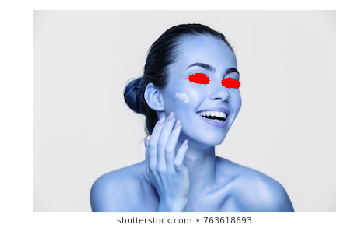

In [ ]:
# Display images with individual detection of face parts 

# For example, for eye detection

eye_points = (36,47)
selected_landmarks = landmarks[eye_points[0]:eye_points[1]+1]
image_landmarks(image,selected_landmarks)

### YOUR CODE HERE
eyebrow_points = (17,26)

### END CODE

EYES DETECTION


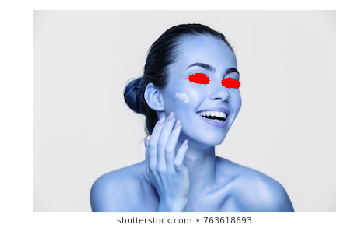

NOSE DETECTION


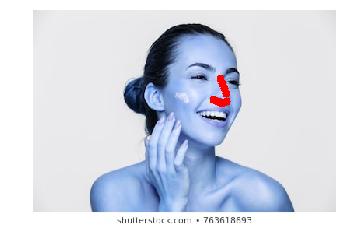

MOUTH DETECTION


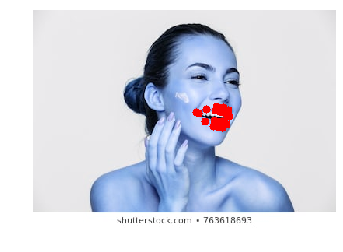

JAWLINE DETECTION


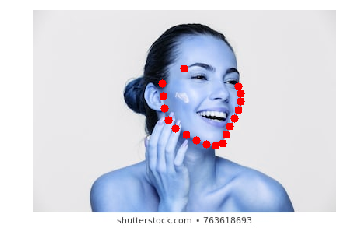

EYEBROWS DETECTION


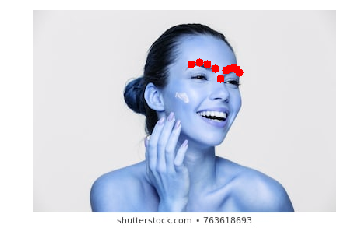

In [ ]:
#@title The solution!
FACIAL_LANDMARKS_IDXS = {"EYES":(36,47),
                        "NOSE":(27,35),
                        "MOUTH":(48,67),
                        "JAWLINE":(0,17),
                        "EYEBROWS":(18,27)}

for key,value in FACIAL_LANDMARKS_IDXS.items():
  print (key,"DETECTION")
  selected_landmarks = landmarks[value[0]:value[1]+1]
  image_landmarks(image,selected_landmarks)